In [6]:
import numpy as np
from nltk.util import everygrams
from collections import Counter
import matplotlib.pyplot as plt

N = 3
alpha = 0.1

train = open("en-de/train.en-de.low.filt.en", "r", encoding="UTF-8").readlines()
test = open("en-de/test.en-de.low.en", "r", encoding="UTF-8").readlines()

In [7]:
padded_train = []
for sentence in train:
    padded_train.append(["<s>"]*N + sentence.strip().split() + ["</s>"])

In [8]:
counter = Counter()
for sentence in padded_train:
    counter.update(everygrams(sentence,1,N))

len_train = 0
vocab = set()
for item, count in counter.items():
    if len(item) == 1:
        vocab.add(item[0])
        len_train += count

In [9]:
padded_test_token = []
padded_test_uniform = []
for sentence in test:
        padded_test_token.append(["<s>"]*N + [word if word in vocab else "<unk>" for word in sentence.strip().split()] + ["</s>"])
        padded_test_uniform.append(["<s>"]*N + [word if word in vocab else np.random.choice(list(vocab)) for word in sentence.strip().split()] + ["</s>"])

In [10]:
def theta_et(window, current):
    whole = counter[tuple(window+current)]
    past = counter[tuple(window)]
    if past == 0:
        return 0
    else:
        return whole/past

def LM(window, current):
    if len(window) == 0:
        return counter[tuple(current)]/len_train
    else:
        current_order = theta_et(window, current)
        higher_orders = LM(window[1:], current)
        return (1-alpha)*current_order + alpha*higher_orders

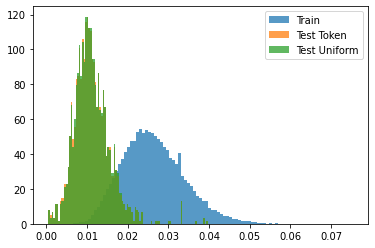

In [99]:
train_scores = []
test_token_scores = []
test_uniform_scores = []

for sentence in padded_train:
    sentence_score = 0
    for i in range(len(sentence)):
        if i >= N:
            sentence_score += LM(sentence[i-N:i],[sentence[i]])
    train_scores.append(sentence_score/len(sentence))

for sentence in padded_test_token:
    sentence_score = 0
    for i in range(len(sentence)):
        if i >= N:
            sentence_score += LM(sentence[i-N:i],[sentence[i]])
    test_token_scores.append(sentence_score/len(sentence))

for sentence in padded_test_uniform:
    sentence_score = 0
    for i in range(len(sentence)):
        if i >= N:
            sentence_score += LM(sentence[i-N:i],[sentence[i]])
    test_uniform_scores.append(sentence_score/len(sentence))

_ = plt.hist(train_scores,100,density=True,alpha=0.75,label="Train")
_ = plt.hist(test_token_scores,100,density=True,alpha=0.75,label="Test Token")
_ = plt.hist(test_uniform_scores,100,density=True,alpha=0.75,label="Test Uniform")
plt.legend()
plt.show()

In [46]:
def greedy_search_step(past):
    best_word = ""
    best_score = 0
    for word in list(vocab):
        score = LM(past[N:],[word])
        if score > best_score:
            best_score = score
            best_word = word
    return best_word

def random_search_step(past):
    words = []
    scores = []
    for word in list(vocab):
        words.append(word)
        scores.append(LM(past[N:],[word]))
    probabilities = np.array(scores)/np.sum(np.array(scores))
    return np.random.choice(words, p = probabilities)

def search(seed, length, strat="greedy"):
    sentence = seed.split()
    for _ in range(length):
        if sentence[-1] == "</s>":
            return " ".join(sentence)
        if strat == "greedy":
            prediction = greedy_search_step(sentence)
        if strat == "random":
            prediction = random_search_step(sentence)
        sentence.append(prediction)
    return " ".join(sentence)

In [58]:
seed = "the little man had"
length = 10
print(search(seed, length, "greedy"))
print(search(seed, length, "random"))

the little man had to be a little bit of a sudden , the
the little man had established toward greater complexity . </s>


In [59]:
seed = "the little woman had"
length = 10
print(search(seed, length, "greedy"))
print(search(seed, length, "random"))

the little woman had to be a little bit of a sudden , the
the little woman had productivity go from 44,000 to 180,000 . '' </s>
